In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib notebook

In [2]:
#Import the files
df1 = pd.read_csv('export2018.csv')
df2 = pd.read_csv('export2017.csv')
df3 = pd.read_csv('export2016.csv')
df4 = pd.read_csv('export2015.csv')
df5 = pd.read_csv('export2014.csv')

#clean files
df1 = df1.iloc[2:, :]
df2 = df2.iloc[2:, :]
df3 = df3.iloc[2:, :]
df4 = df4.iloc[2:, :]
df5 = df5.iloc[2:, :]

#Add a percent column showing percent of religion out of total population
def percent(row):
    return (1 - int(row[2])/int(row[6])) * 100

df1['percent'] = df1.apply(percent, axis=1)
df2['percent'] = df2.apply(percent, axis=1)
df3['percent'] = df3.apply(percent, axis=1)
df4['percent'] = df4.apply(percent, axis=1)
df5['percent'] = df5.apply(percent, axis=1)

#combine into one easy to read dataframe
d = {'2014': df5['percent'], '2015': df4['percent'], '2016': df3['percent'], '2017': df2['percent'], '2018': df1['percent']}
df = pd.DataFrame(data=d)

df = df.T

#rename columns
df = df.rename(columns={2:'North Wales', 3:'Mid and South West Wales', 4:'South East Wales'})

df.head()

,North Wales,Mid and South West Wales,South East Wales
2014,65.753025,61.480651,59.215052
2015,65.146437,59.867237,56.856951
2016,63.143356,58.556030,53.879108
2017,60.870196,56.759477,52.156603
2018,58.181818,53.890747,49.405155


<IPython.core.display.Javascript object>


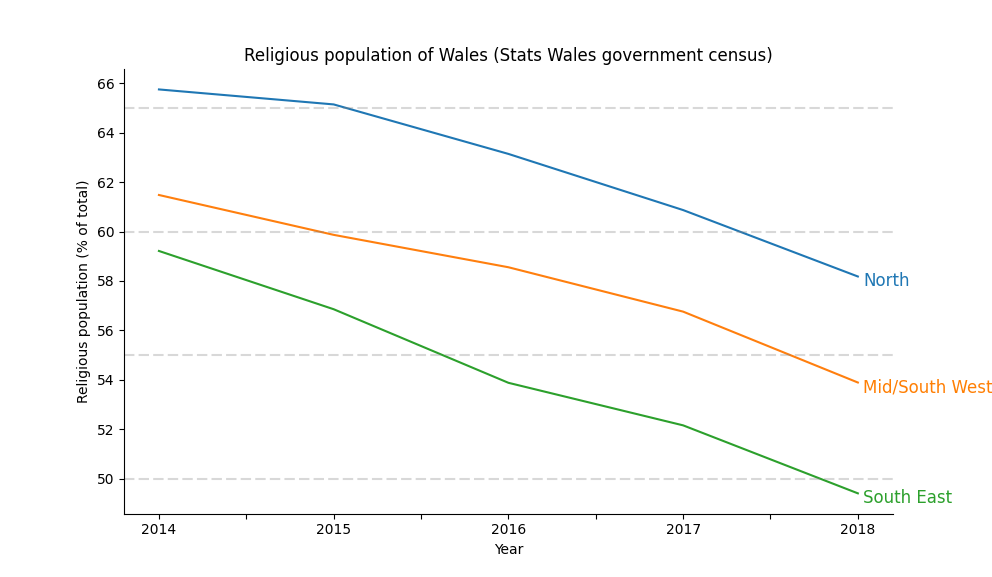

Text(4.03, 49.00515532055518, 'South East')

In [4]:
#plot the graph
ax = df.plot()

#relable
plt.title('Religious population of Wales (Stats Wales government census)')
plt.ylabel('Religious population (% of total)')
plt.xlabel('Year')

#add in lines for ease of reading
for i in range(4):
    plt.axhline(y=50+(i*5), alpha=0.3, c='grey', dashes=(5, 2))
    
#remove unnecessary border lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#remove legend and add in text for clarity
ax.get_legend().remove()
plt.text(4.03, df.iloc[4, 0]-0.4, 'North', fontsize=12, c='#1f77b4')
plt.text(4.03, df.iloc[4, 1]-0.4, 'Mid/South West', fontsize=12, c='#ff7f03')
plt.text(4.03, df.iloc[4, 2]-0.4, 'South East', fontsize=12, c='#2ca02c')
